**Лабораторная работа №2**

In [399]:
import math
import numpy as np
import matplotlib.pyplot as plt

**Задание 1. Построение ковариационной функции, семивариограммы и спектральной плотности.**

In [400]:
def R_1(t, D, a):
    return D * math.exp(- a * abs(t))
def R_2(t, D, a, b):
    return D * math.exp(- a * abs(t)) * (math.cos(b * t) - (a / b) * math.sin(b * abs(t)))
def Semivar_1(t, D, a):
    return R_1(0, D, a) - R_1(t, D, a)
def Semivar_2(t, D, a, b):
    return R_2(0, D, a, b) - R_2(t, D, a, b)
def S_1(l, D, a):
    return (D * a) / (math.pi * ((a * a) + (l * l)))
def S_2(l, D, a, b):
    return (2 * D * a * l * l) / (math.pi * ((a * a) + math.pow(l - b, 2)) * ((a * a) + math.pow(l + b, 2)))    

Задание параметров

In [401]:
length = 80
t = np.arange(0, length)
l  = np.arange(0, 4, 4 / length)
param_n = 3
a = [0.1, 0.3, 0.5]
d = [0.8, 2, 3]
b = [0.1, 0.5, 1]

1\) 1-ая ковариационная функция из таблицы.

График ковариационной функции.

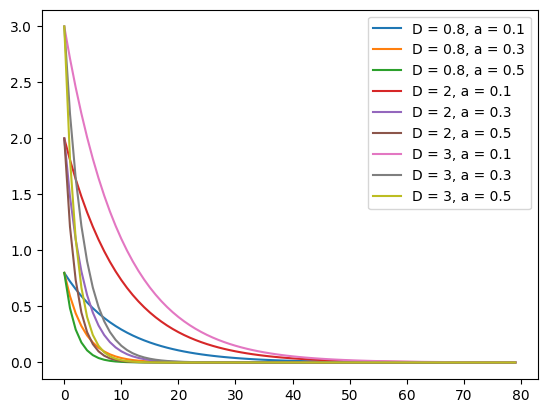

In [402]:

r_1 = [0.] * length
for d_x in d:
    for a_x in a:
        for i in range(length):
            r_1[i] = R_1(t[i], d_x, a_x)
        
        plt.plot(t, r_1, label = f'D = {d_x}, a = {a_x}')

plt.legend()
plt.show()

График семивариограммы.

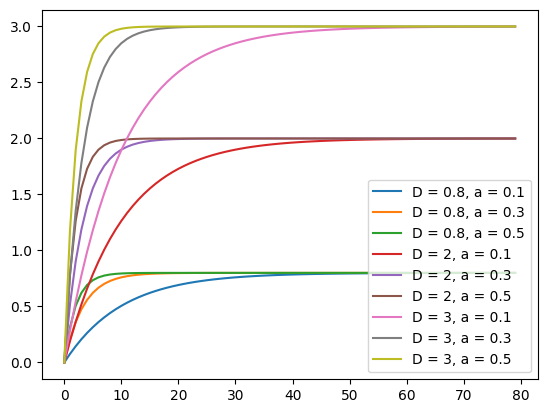

In [403]:
semivar_1 = [0.] * length
for d_x in d:
    for a_x in a:
        for i in range(length):
            semivar_1[i] = Semivar_1(t[i], d_x, a_x)
        
        plt.plot(t, semivar_1, label = f'D = {d_x}, a = {a_x}')

plt.legend()
plt.show()

График спектральной плотности.

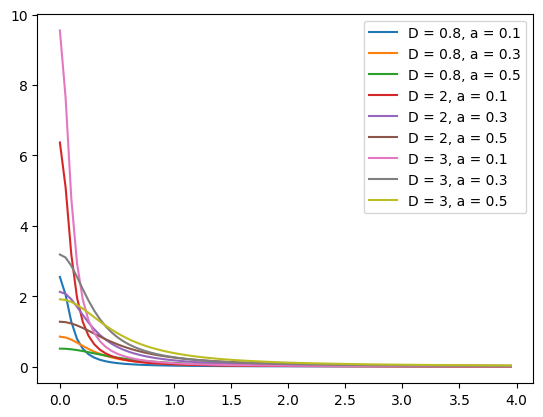

In [404]:
s_1 = [0.] * length
for d_x in d:
    for a_x in a:
        for i in range(length):
            s_1[i] = S_1(l[i], d_x, a_x)

        plt.plot(l, s_1, label = f'D = {d_x}, a = {a_x}')
            
plt.legend()
plt.show()

Ковариационная функция и семивариограмма для одного набора параметров.

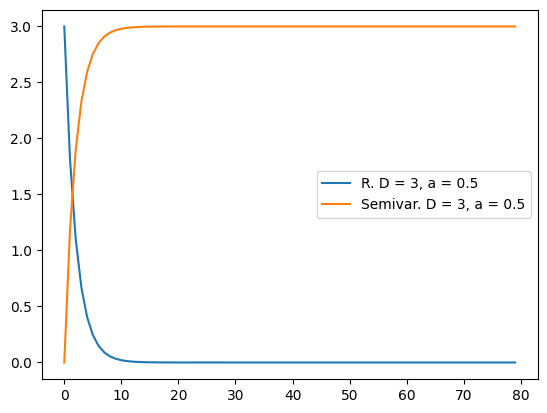

In [405]:
plt.plot(t, r_1, label = f'R. D = {d[2]}, a = {a[2]}')
plt.plot(t, semivar_1, label = f'Semivar. D = {d[2]}, a = {a[2]}')

plt.legend()
plt.show()

Вывод:

Ковариационная функция монотонно убывает с экспоненциальной скоростью. Параметр D отвечает за дисперсию, это R(0). Чем больше параметр a, тем быстрее убывает ковариационная функция, т.е. уменьшается зависимость (ковариационная функция описывает зависимость с течением времени). При увеличении времени функция стремится к нулю. Ковариационная функция принимает только положительные значения.

График семивариограммы соответствует теории. В точке 0 семивариограмма имеет нулевое значение, а при увеличении времени она стремится к пороговому значению: к дисперсии D = R(0). Графики ковариационной функции и семивариограммы проходят зеркально друг к другу (это следствие того, что случайным процесс является стационарным в широком смысле). Семивариограмма описывает независимость с течением времени.

Спектральная плотность также убывает с увеличением лямбда и стремится к нулю. Она принимает только положительные значения, что соответствует теории. Т.к. в точке 0 функция принимает значение D / (pi * a) и далее убывает, то чем меньше отношение D к a, тем более маленькие значения принимает функция.

Все функции являются чётными, поэтому рассматривается только положительная часть оси.

Модель относится к монотонно убывающему классу.

2\) 5-ая ковариационная функция из таблицы.

График ковариационной функции.

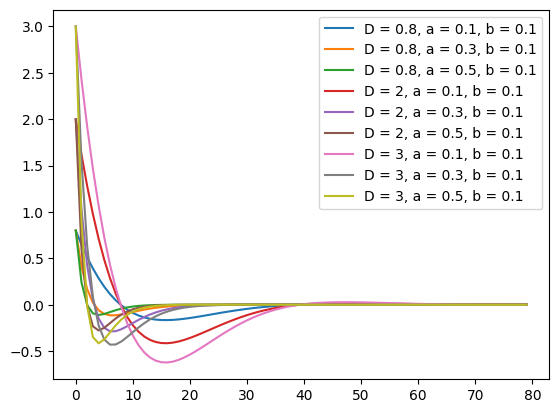

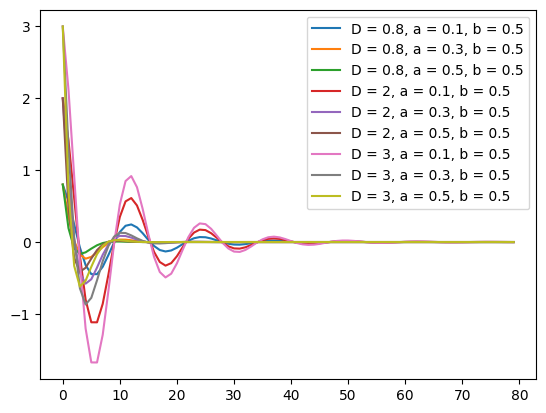

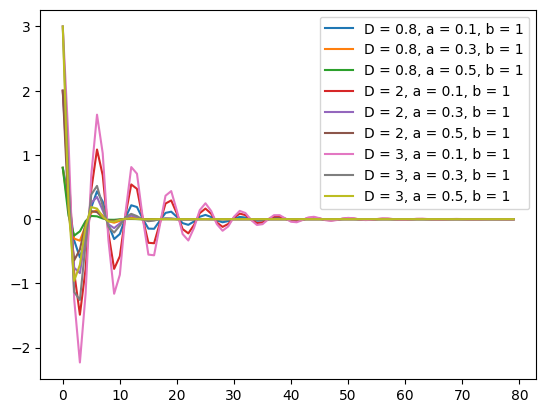

In [406]:
r_2 = [0.] * length
for b_x in b:
    for d_x in d:
        for a_x in a:
            for i in range(length):
                r_2[i] = R_2(t[i], d_x, a_x, b_x)
            
            plt.plot(t, r_2, label = f'D = {d_x}, a = {a_x}, b = {b_x}')

    plt.legend()
    plt.show()

График семивариограммы.

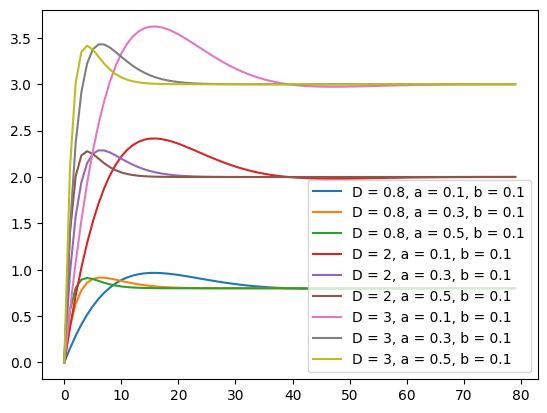

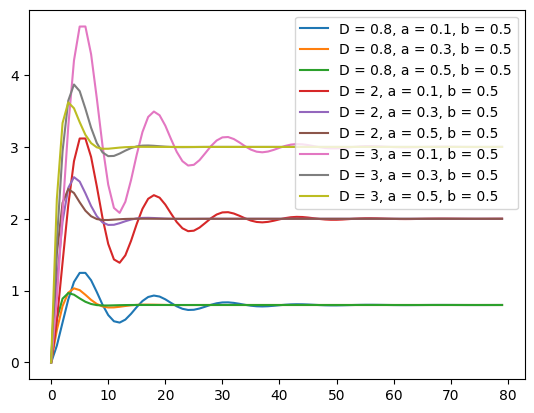

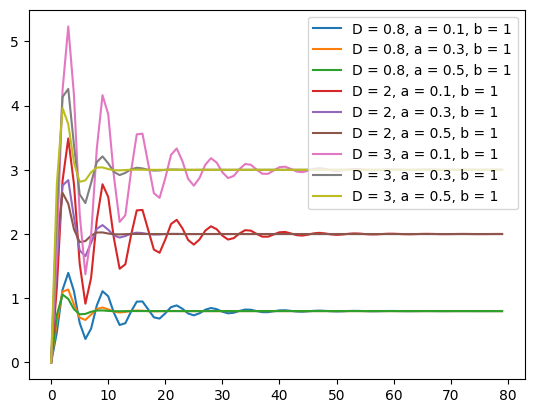

In [407]:
semivar_2 = [0.] * length
for b_x in b:
    for d_x in d:
        for a_x in a:
            for i in range(length):
                semivar_2[i] = Semivar_2(t[i], d_x, a_x, b_x)
            
            plt.plot(t, semivar_2, label = f'D = {d_x}, a = {a_x}, b = {b_x}')
    
    plt.legend()
    plt.show()             

График спектральной плотности.

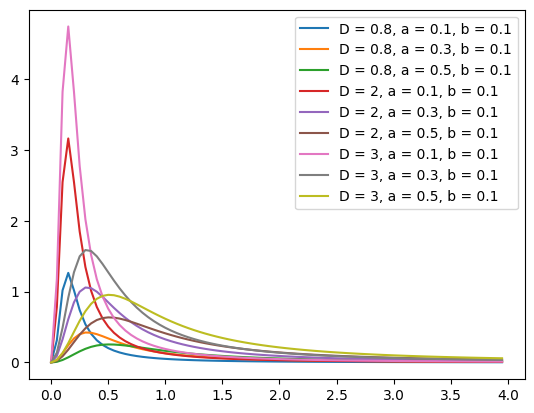

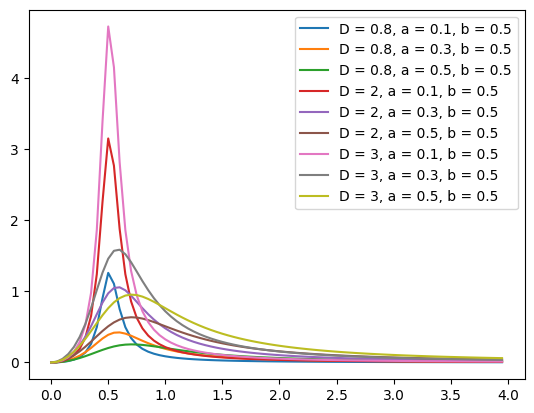

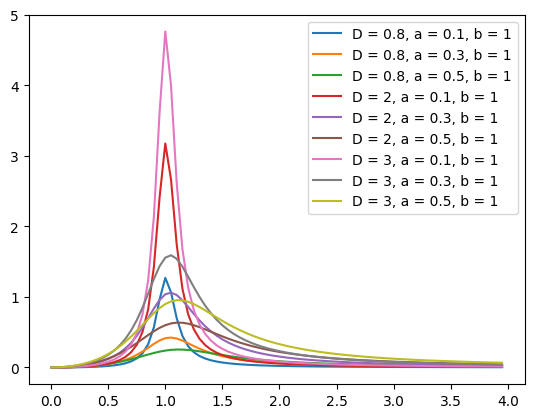

In [408]:
s_2 = [0.] * length
for b_x in b:
    for d_x in d:
        for a_x in a:
            for i in range(length):
                s_2[i] = S_2(l[i], d_x, a_x, b_x)

            plt.plot(l, s_2, label = f'D = {d_x}, a = {a_x}, b = {b_x}')
    
    plt.legend()
    plt.show()


Ковариационная функция и семивариограмма для одного набора параметров.

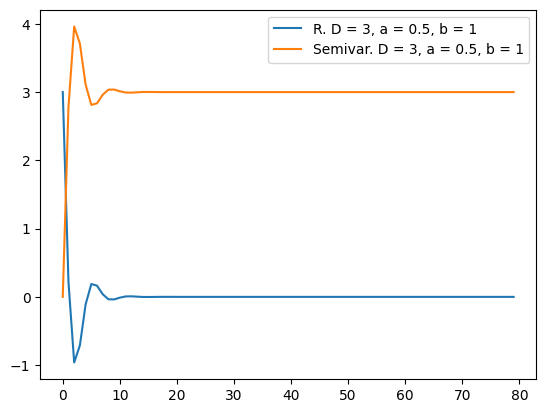

In [409]:
plt.plot(t, r_2, label = f'R. D = {d[2]}, a = {a[2]}, b = {b[2]}')
plt.plot(t, semivar_2, label = f'Semivar. D = {d[2]}, a = {a[2]}, b = {b[2]}')

plt.legend()
plt.show()

Вывод:

Ковариационная функция имеет колебательный характер. Параметр D отвечает за дисперсию, это R(0). Чем больше отношение b к a, тем больше выявляются колебания функции. При увеличении времени функция стремится к нулю. Ковариационная функция принимает и положительные, и отрицательные значения.

График семивариограммы соответствует теории. В точке 0 семивариограмма имеет нулевое значение, а при увеличении времени она стремится к пороговому значению: к дисперсии D = R(0). Графики ковариационной функции и семивариограммы проходят зеркально друг к другу.

Спектральная плотность принимает только положительные значения, что соответствует теории. В точке 0 функция принимает нулевое значение, а далее на графике виден пик, там спектральная плотность принимает своё максимальное значение (в следующем пункте будет указано, какая это точка, она зависит от параметров a и b). После пика функция убывает и стремится к нулю.

Все функции являются чётными, поэтому рассматривается только положительная часть оси.

Модель относится к колебательному классу.

**Задание 2. Время корреляции.**

In [410]:
def t0_1(a):
    return [1 / a, 1 / a, 1 / (2 * a)]
def t0_2(a, b):
    return [0, math.nan, 1 / (4 * a)]

1-ая ковариационная функция.

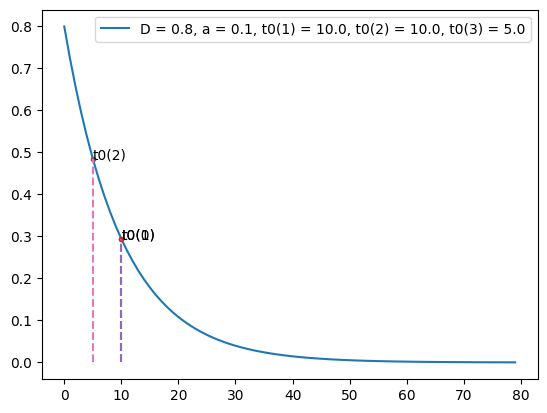

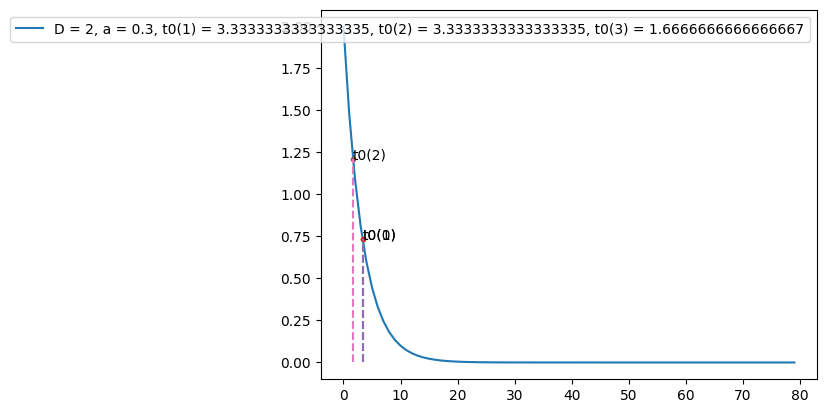

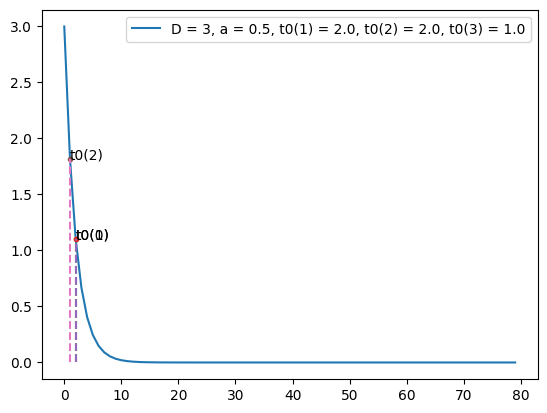

In [411]:
t0 = [[]] * param_n
for i in range(param_n):
    t0[i] = t0_1(a[i])
    
    for j in range(length):
        r_1[j] = R_1(t[j], d[i], a[i])
            
    plt.plot(t, r_1, label = f'D = {d[i]}, a = {a[i]}, t0(1) = {t0[i][0]}, t0(2) = {t0[i][1]}, t0(3) = {t0[i][2]}')

    for j in range(len(t0[i])):
        plt.plot(t0[i][j], R_1(t0[i][j], d[i], a[i]), '.')
        plt.text(t0[i][j], R_1(t0[i][j], d[i], a[i]), f't0({j})')
        plt.plot((t0[i][j], t0[i][j]), (0, R_1(t0[i][j], d[i], a[i])), '--')
    
    plt.legend()
    plt.show()

5-ая ковариационная функция.

posx and posy should be finite values
posx and posy should be finite values


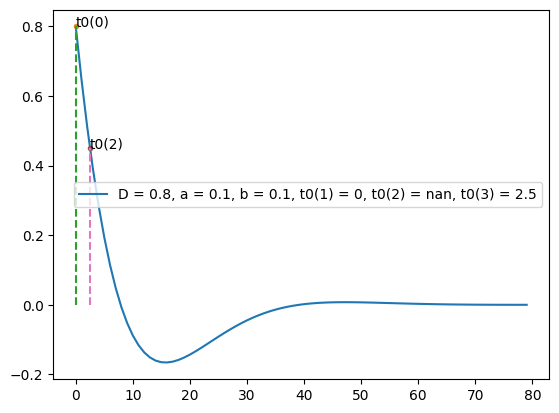

posx and posy should be finite values
posx and posy should be finite values


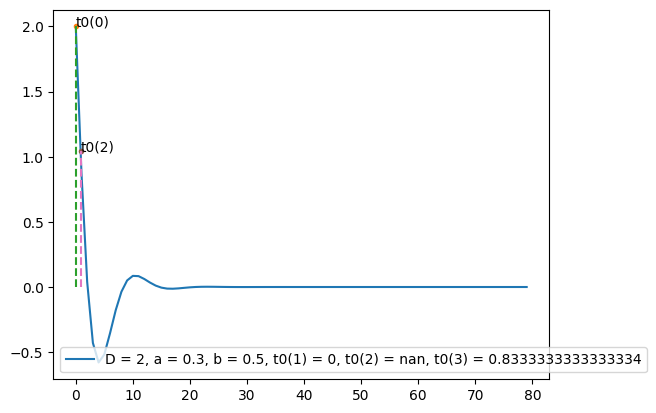

posx and posy should be finite values
posx and posy should be finite values


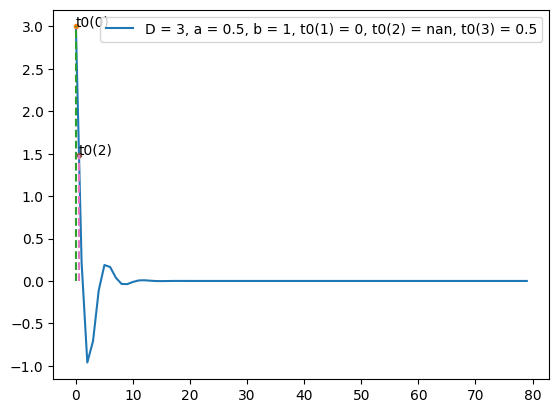

In [412]:
t0 = [[]] * param_n
for i in range(param_n):
    t0[i] = t0_2(a[i], b[i])
    
    for j in range(length):
        r_2[j] = R_2(t[j], d[i], a[i], b[i])
            
    plt.plot(t, r_2, label = f'D = {d[i]}, a = {a[i]}, b = {b[i]}, t0(1) = {t0[i][0]}, t0(2) = {t0[i][1]}, t0(3) = {t0[i][2]}')

    for j in range(len(t0[i])):
        plt.plot(t0[i][j], R_2(t0[i][j], d[i], a[i], b[i]), '.')
        plt.text(t0[i][j], R_2(t0[i][j], d[i], a[i], b[i]), f't0({j})')
        plt.plot((t0[i][j], t0[i][j]), (0, R_2(t0[i][j], d[i], a[i], b[i])), '--')
    
    plt.legend()
    plt.show()

**Задание 3. Ширина спектра.**

In [413]:
def L1(D, a):
    return R_1(0, D, a) / S_1(0, D, a)

def L2(D, a, b):
    l_e = math.sqrt((a * a) + (b * b))
    return l_e + (R_2(0, D, a, b) / (4 * S_2(l_e, D, a, b)))

Ширина спектра для 1-ой ковариационной функции при трёх наборах параметров.

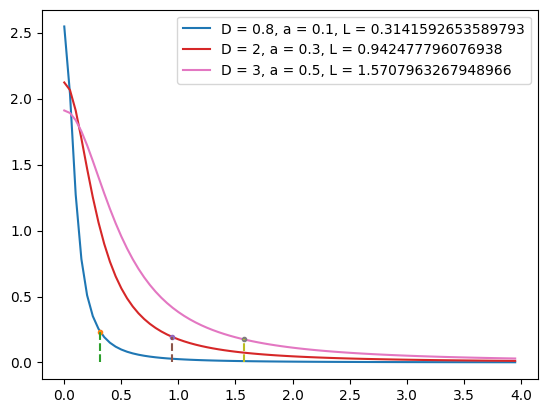

In [414]:
l1 = [0.] * param_n
for i in range(param_n):
    l1[i] = L1(d[i], a[i])
    
    for j in range(length):
        s_1[j] = S_1(l[j], d[i], a[i])
            
    plt.plot(l, s_1, label = f'D = {d[i]}, a = {a[i]}, L = {l1[i]}')

    plt.plot(l1[i], S_1(l1[i], d[i], a[i]), '.')
    plt.plot((l1[i], l1[i]), (0, S_1(l1[i], d[i], a[i])), '--')

plt.legend()
plt.show()

Ширина спектра для 5-ой ковариационной функции при трёх наборах параметров.

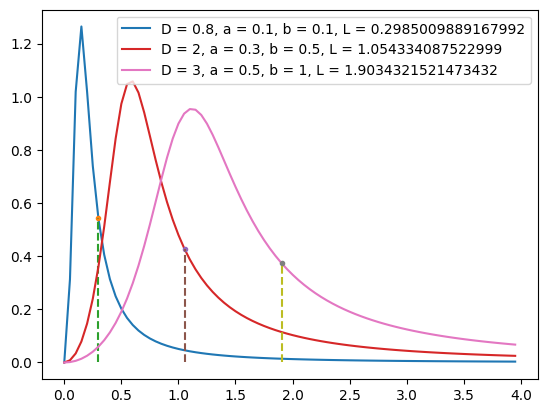

In [415]:
l2 = [0.] * param_n
for i in range(param_n):
    l2[i] = L2(d[i], a[i], b[i])
    
    for j in range(length):
        s_2[j] = S_2(l[j], d[i], a[i], b[i])
            
    plt.plot(l, s_2, label = f'D = {d[i]}, a = {a[i]}, b = {b[i]}, L = {l2[i]}')
    
    plt.plot(l2[i], S_2(l2[i], d[i], a[i], b[i]), '.')
    plt.plot((l2[i], l2[i]), (0, S_2(l2[i], d[i], a[i], b[i])), '--')

plt.legend()
plt.show()